In [22]:
%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.skybrightness as sb
import matplotlib.pylab as plt

In [2]:
# Load up the sky model
sm = sb.SkyModel(observatory='LSST', mags=True)

In [10]:
step = 0.01
mjds = np.concatenate([np.arange(56750, 56750.5, step), np.arange(56763,56763.5,step)])
alts = [90., 45.]
azs=[0.,0.]

In [16]:
result = []
for mjd in mjds:
    for alt,az in list(zip(alts, azs)):
        sm.setRaDecMjd(az, alt, mjd, degrees=True, azAlt=True)
        mags = sm.returnMags()
        result.append([alt, az, mjd, mags['u'].max(), mags['g'].max(),
                       mags['r'].max(), mags['i'].max(), mags['z'].max(), mags['y'].max()])

In [20]:
result = np.array(result)
result

array([[  9.00000000e+01,   0.00000000e+00,   5.67500000e+04, ...,
          2.04037396e+01,   1.94357547e+01,   1.82315743e+01],
       [  4.50000000e+01,   0.00000000e+00,   5.67500000e+04, ...,
          1.99879132e+01,   1.90525733e+01,   1.78708319e+01],
       [  9.00000000e+01,   0.00000000e+00,   5.67500100e+04, ...,
          2.04120953e+01,   1.94414507e+01,   1.82367497e+01],
       ..., 
       [  4.50000000e+01,   0.00000000e+00,   5.67634800e+04, ...,
          1.89838071e+01,   1.86149738e+01,   1.77573596e+01],
       [  9.00000000e+01,   0.00000000e+00,   5.67634900e+04, ...,
          1.93205263e+01,   1.89339084e+01,   1.80889387e+01],
       [  4.50000000e+01,   0.00000000e+00,   5.67634900e+04, ...,
          1.90741945e+01,   1.86574860e+01,   1.77708063e+01]])

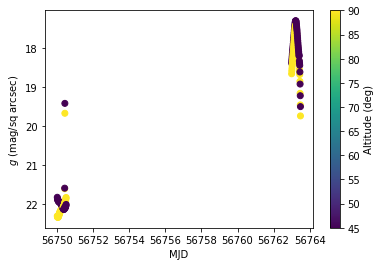

In [42]:
plt.scatter(result[:,2], result[:,4], c=result[:,0])
plt.gca().invert_yaxis()
plt.ylabel(r'$g$ (mag/sq arcsec)')
plt.xlabel('MJD')
cb = plt.colorbar()
cb.set_label('Altitude (deg)')

In [37]:
print('altitude (deg), az (deg), MJD, u, g, r, i, z, y')
for r in result:
    print(np.array2string(r, separator=', '))

altitude (deg), az (deg), MJD, u, g, r, i, z, y
[  9.00000000e+01,   0.00000000e+00,   5.67500000e+04,   2.28015957e+01,
   2.22970402e+01,   2.13132321e+01,   2.04037396e+01,   1.94357547e+01,
   1.82315743e+01]
[  4.50000000e+01,   0.00000000e+00,   5.67500000e+04,   2.25441689e+01,
   2.18187388e+01,   2.08547244e+01,   1.99879132e+01,   1.90525733e+01,
   1.78708319e+01]
[  9.00000000e+01,   0.00000000e+00,   5.67500100e+04,   2.28509085e+01,
   2.23251411e+01,   2.13235731e+01,   2.04120953e+01,   1.94414507e+01,
   1.82367497e+01]
[  4.50000000e+01,   0.00000000e+00,   5.67500100e+04,   2.25991728e+01,
   2.18535093e+01,   2.08715540e+01,   1.99995952e+01,   1.90597561e+01,
   1.78763968e+01]
[  9.00000000e+01,   0.00000000e+00,   5.67500200e+04,   2.28525900e+01,
   2.23271065e+01,   2.13231569e+01,   2.04114529e+01,   1.94410900e+01,
   1.82366175e+01]
[  4.50000000e+01,   0.00000000e+00,   5.67500200e+04,   2.26059417e+01,
   2.18686076e+01,   2.08807411e+01,   2.00040582e+01,